# Tarea Examen 2
### Ejercicio 2

## Jonathan Alexis Urrutia Anguiano 414011025

In [53]:
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import *
import matplotlib.animation as animation
from JSAnimation import IPython_display
%matplotlib inline

from pylab import *


Sea el Hamiltoniano $H$
$$ H = \frac12 (p^2_x + p^2_y) + \frac12 (x^2+y^2) + x^2 y - \frac13 y^3, $$

y como no hay dependencia del tiempo y $V = V(\vec r)$, $H=E$ y es una coonstante de movimiento. Programemos el Hamiltoniano

In [54]:
def H(x_p):
    x, y, px, py = x_p[0], x_p[1], x_p[2], x_p[3]
    return 0.5*(px**2 + py**2) + 0.5*(x**2 + y**2) + (x**2)*y- (y**3)/3.

Como $E=H =T-V$, indentificamos al potencial como
$$ V = \frac12 (x^2+y^2) + x^2 y - \frac13 y^3, $$
y para ver si hay trayectorias cerradas, grafiquemos le potencial en $y$ con varios cortes en $x$.

In [55]:
def V(x,y):
    return 0.5*(x**2+y**2) + (x**2)*y - (y**3)/3.

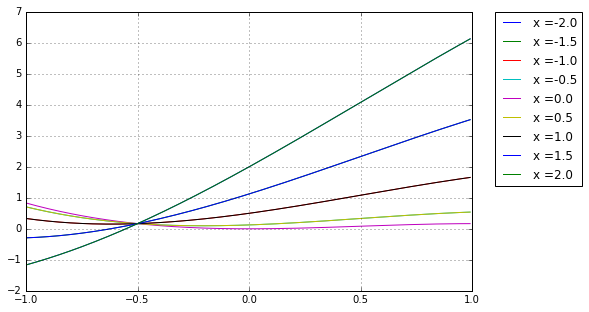

In [56]:
cortes_x = arange(-2,2.1,.5)
y = arange(-1,1,.01)

fig, ax = plt.subplots(figsize=(8,5))
for x in cortes_x:
     plot(y, V(x,y),label= 'x ='+str(x))

grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()


Ahora calculando las derivadas del hamiltoniano respecto a los mmomentos y a las posiciones es posible obtener la ec. de movimiento a resolver, que es

$$
\left(\begin{array}{c}\dot u_1 \\ \dot v_1 \\ \dot u_2\\ \dot v_2\end{array}\right) = \left(\begin{array}{c} u_2 \\ v_2 \\-u_1(2v_1+1)\\ v^2_1 - v_1 - u^2_1\end{array}\right)
$$

con $x = u_1,\, u_2 = \dot x,\, v_1 =y$ y $v_2 = \dot y$

In [33]:
def ec_mov(x,t):  #x = [x,y,px,py]
    u1, v1, u2, v2 = x[0], x[1], x[2], x[3]
    return array([u2,v2, -u1*(2*v1+1), v1**2 -v1 - u1**2])

Y vamos a obtnener condiciones iniciales tales que $E< E_0$, con $E_0$ una energía dada

In [34]:
def condiciones(E_0):
    E =  2*E_0
    while E > E_0:
        y = rand()
        py = rand()
        px = rand()
        E = H([0,y,py,px])
    return array([0, y, py, px])

Condiciones iniciales elegidas: [ 0.          0.04091173  0.44280412  0.0134722 ]
Energia inicial: 0.142857142857


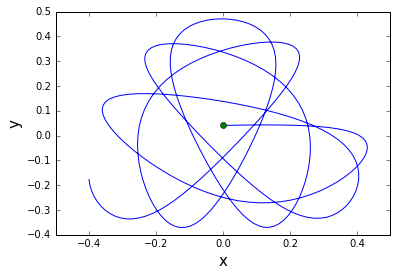

In [47]:
E_0 = 1/7.

cond_ini = condiciones(E_0)
print "Condiciones iniciales elegidas:", cond_ini
print "Energia inicial:", E_0


t =arange(0,30,.1)
sol = odeint(ec_mov,cond_ini,t,atol=1e-19,rtol=1e-9)
xlabel('x',fontsize =15), ylabel('y',fontsize =15)
plot(sol[:,0],sol[:,1])
plot(cond_ini[0],cond_ini[1],'o')
show()

In [48]:
def root_trayec(func,pto_i,ti,error=1e-5):
    while abs(pto_i[0])>error:
        tip1 = ti - (pto_i[0]/pto_i[2])
        paso = odeint(func,pto_i,[ti,tip1])
        ti,pto_i = tip1,paso[-1]
    return ti,pto_i

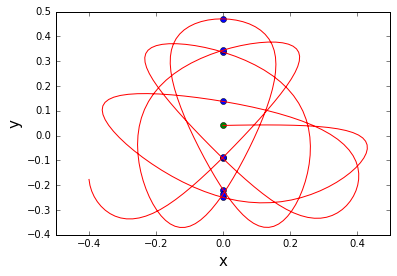

In [49]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,4))
j=0
for i in range(len(t)-1):
    if (sol[i][0]*sol[i+1][0]) < 0:
        raices[j],puntos[j] = root_trayec(ec_mov,sol[i],t[i])
        j+=1
raices,puntos = raices[0:j],puntos[0:j]
xlabel('x',fontsize =15), ylabel('y',fontsize =15)
plot(puntos[:,0],puntos[:,1],'o')
plot(cond_ini[0],cond_ini[1],'o')
plot(sol[:,0],sol[:,1])
show()

Ahora declaremos las funciones para el mapero de Poincare

In [17]:
def pseudoraices(func, intervalo, h=1e-2):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    roots = []
    
    for i in xrange(len(tiempo)-1):
        f_l, f_r = func(tiempo[i]) , func(tiempo[i+1])
        if f_l*f_r<=0:
            roots.append(tiempo[i])
    return roots   

def Newton_Raphson(func,x_0, err = 1e-8):
    while abs(func(x_0)) >= err:
        root = x_0 - func(x_0)/deriv_num(func,x_0)
        x_0 = root
    return root

KeyboardInterrupt: 

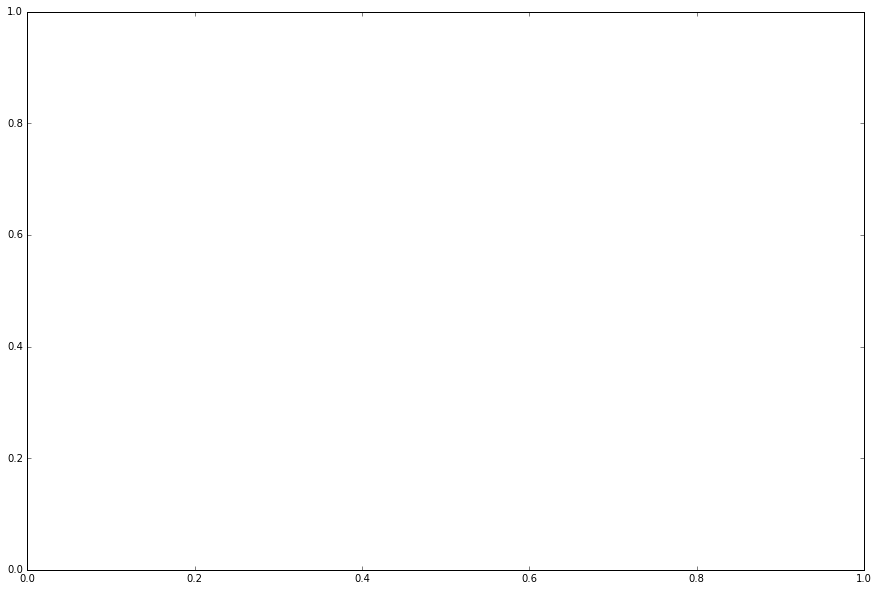

In [19]:
t = linspace(0,1000,10000)
E = arange(0,.5,.05)

fig, ax = plt.subplots(figsize=(15,10))

for e in E:
    puntos = mapeo_poincare(ec_mov,e, t)
    plot(puntos[:,1], puntos[:,3],'.',label= 'E ='+str(e))
    
grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title(r'Mapeo de Poincare de $H$', fontsize=20)#,xlabel('x'),ylabel('y')
show()